In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
traindf=pd.read_csv("train.csv")
valdf=pd.read_csv("val.csv")
testdf=pd.read_csv("test.csv")

In [3]:
xtrain=traindf.drop("raintomorrow", axis=1)
ytrain=traindf["raintomorrow"]

xval=valdf.drop("raintomorrow", axis=1)
yval=valdf["raintomorrow"]

xtest=testdf.drop("raintomorrow", axis=1)
ytest=testdf["raintomorrow"]

In [4]:
base_model=DecisionTreeClassifier(random_state=42)

In [5]:
%%time
base_model.fit(xtrain,ytrain)

CPU times: total: 1.91 s
Wall time: 1.91 s


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [6]:

train_acc=base_model.score(xtrain,ytrain)
val_acc=base_model.score(xval,yval)
test_acc=base_model.score(xtest,ytest)
print(f'train acc:{train_acc}\n val acc:{val_acc}\n test acc:{test_acc}')

train acc:0.9999795893374699
 val acc:0.7936684416876353
 test acc:0.7756126021003501


In [7]:
yval.value_counts()/len(yval)

raintomorrow
No     0.790626
Yes    0.209374
Name: count, dtype: float64

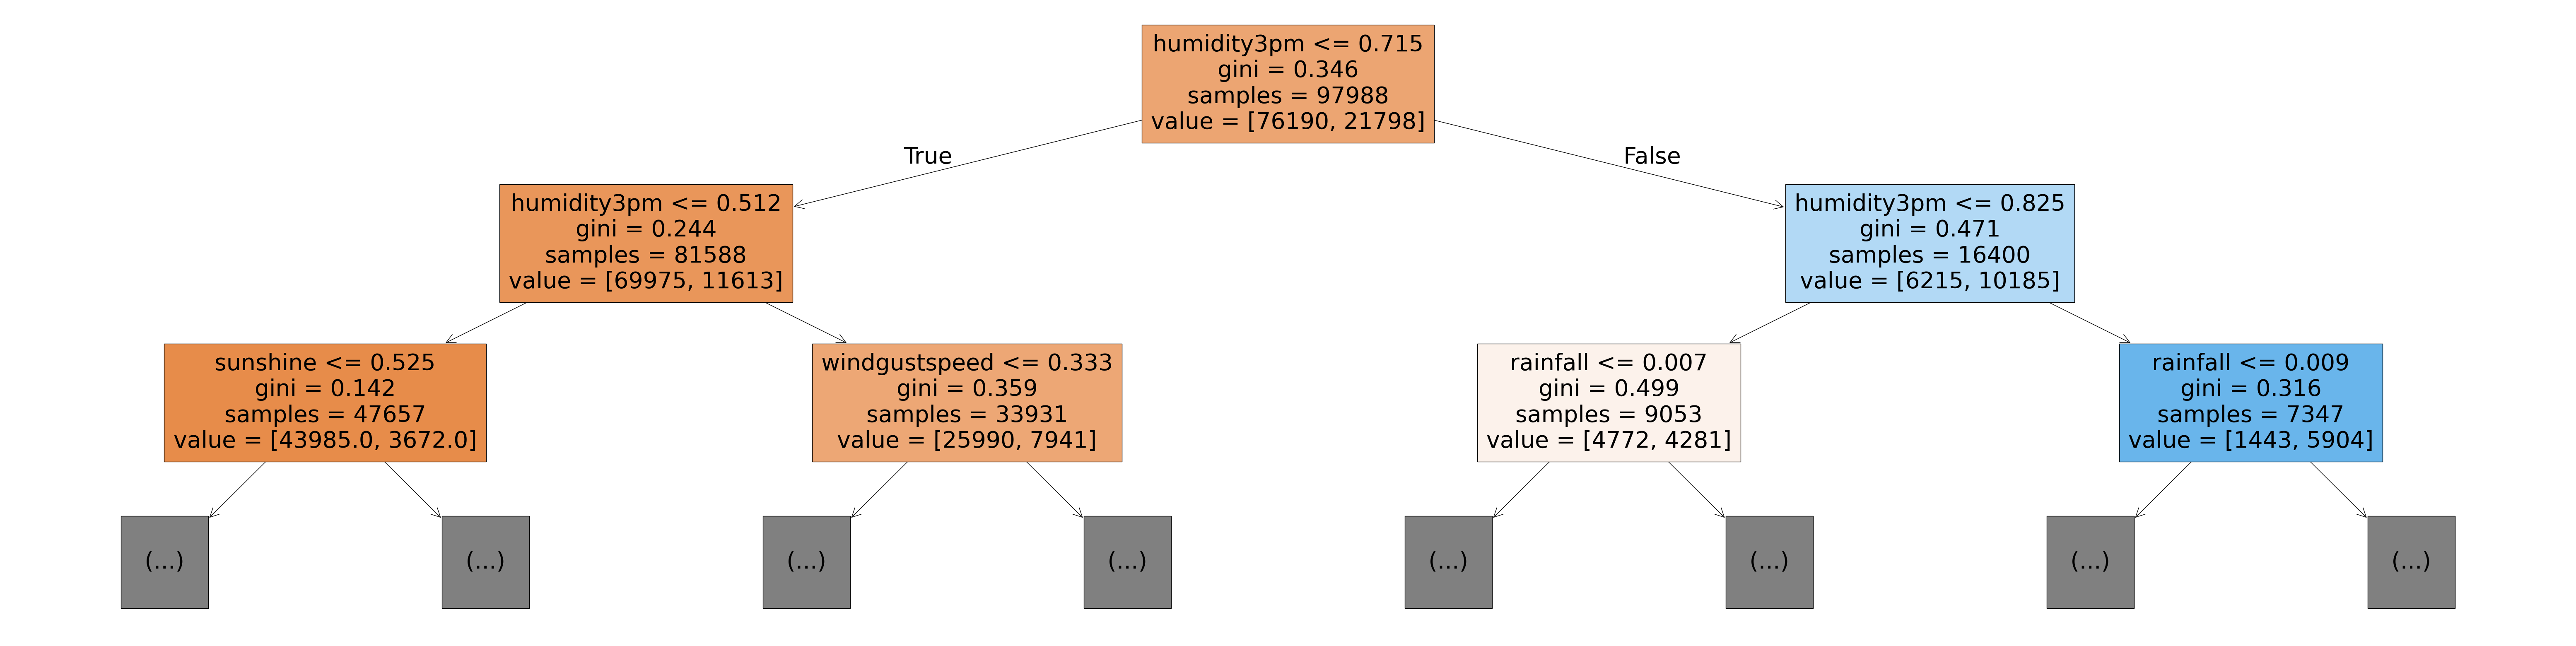

In [8]:
from sklearn.tree import plot_tree,export_text
plt.figure(figsize=(80,20))
plot_tree(base_model,feature_names=xtrain.columns,max_depth=2,filled=True);

In [10]:
base_model.tree_.max_depth

49

In [11]:
base_model.feature_importances_

array([3.72348864e-02, 3.02750170e-02, 4.46807871e-02, 2.31016443e-02,
       4.74029876e-02, 6.02158346e-02, 2.59596261e-02, 2.87123098e-02,
       3.72718924e-02, 2.78696714e-01, 3.74751640e-02, 6.22463592e-02,
       1.50293521e-02, 1.72695492e-02, 3.51997396e-02, 3.28171151e-02,
       2.07437921e-03, 1.64079963e-03, 1.01783054e-03, 6.88212657e-04,
       1.48034667e-03, 1.10335980e-03, 1.19280342e-03, 1.77001797e-03,
       8.18956871e-04, 1.30986391e-03, 8.00314193e-04, 2.03677225e-03,
       1.38645663e-03, 4.84888047e-04, 6.08349928e-04, 1.26483304e-03,
       1.45258514e-04, 1.50514431e-03, 1.07182434e-03, 1.44829853e-03,
       9.12938347e-04, 8.15936194e-04, 1.26468932e-03, 1.49092396e-03,
       6.60526489e-04, 7.09652768e-04, 1.02344514e-03, 1.54844869e-03,
       1.31824900e-03, 6.07286685e-04, 5.04774518e-04, 1.50976724e-03,
       1.36782184e-03, 2.12844007e-03, 1.24769141e-03, 1.92047622e-03,
       1.46145581e-03, 2.12670031e-03, 1.36401119e-03, 4.10431985e-04,
      

In [13]:
importancedf=pd.DataFrame({'feature':xtrain.columns,
                           'importance':base_model.feature_importances_}).sort_values('importance',ascending=False)

In [14]:
importancedf.head(10)

,feature,importance
9,humidity3pm,0.278697
11,pressure3pm,0.062246
5,windgustspeed,0.060216
4,sunshine,0.047403
2,rainfall,0.044681
10,pressure9am,0.037475
8,humidity9am,0.037272
0,mintemp,0.037235
14,temp9am,0.035200
15,temp3pm,0.032817


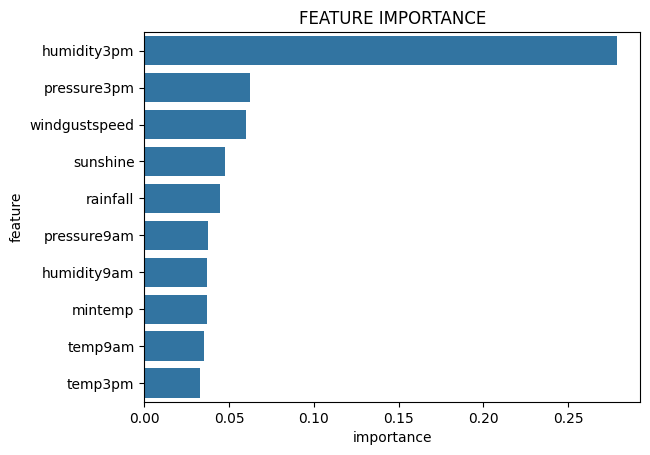

In [15]:
plt.title('FEATURE IMPORTANCE');
sns.barplot(x='importance',y='feature',data=importancedf.head(10));

# hyperparameter tuning

In [16]:
model_1=DecisionTreeClassifier(max_depth=3,random_state=42)

In [17]:
model_1.fit(xtrain,ytrain)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [19]:
train_acc=model_1.score(xtrain,ytrain)
val_acc=model_1.score(xval,yval)
test_acc=model_1.score(xtest,ytest)
print(f'train acc:{train_acc}\n val acc:{val_acc}\n test acc:{test_acc}')

train acc:0.8315916234640977
 val acc:0.8348060155655685
 test acc:0.8218591987553481


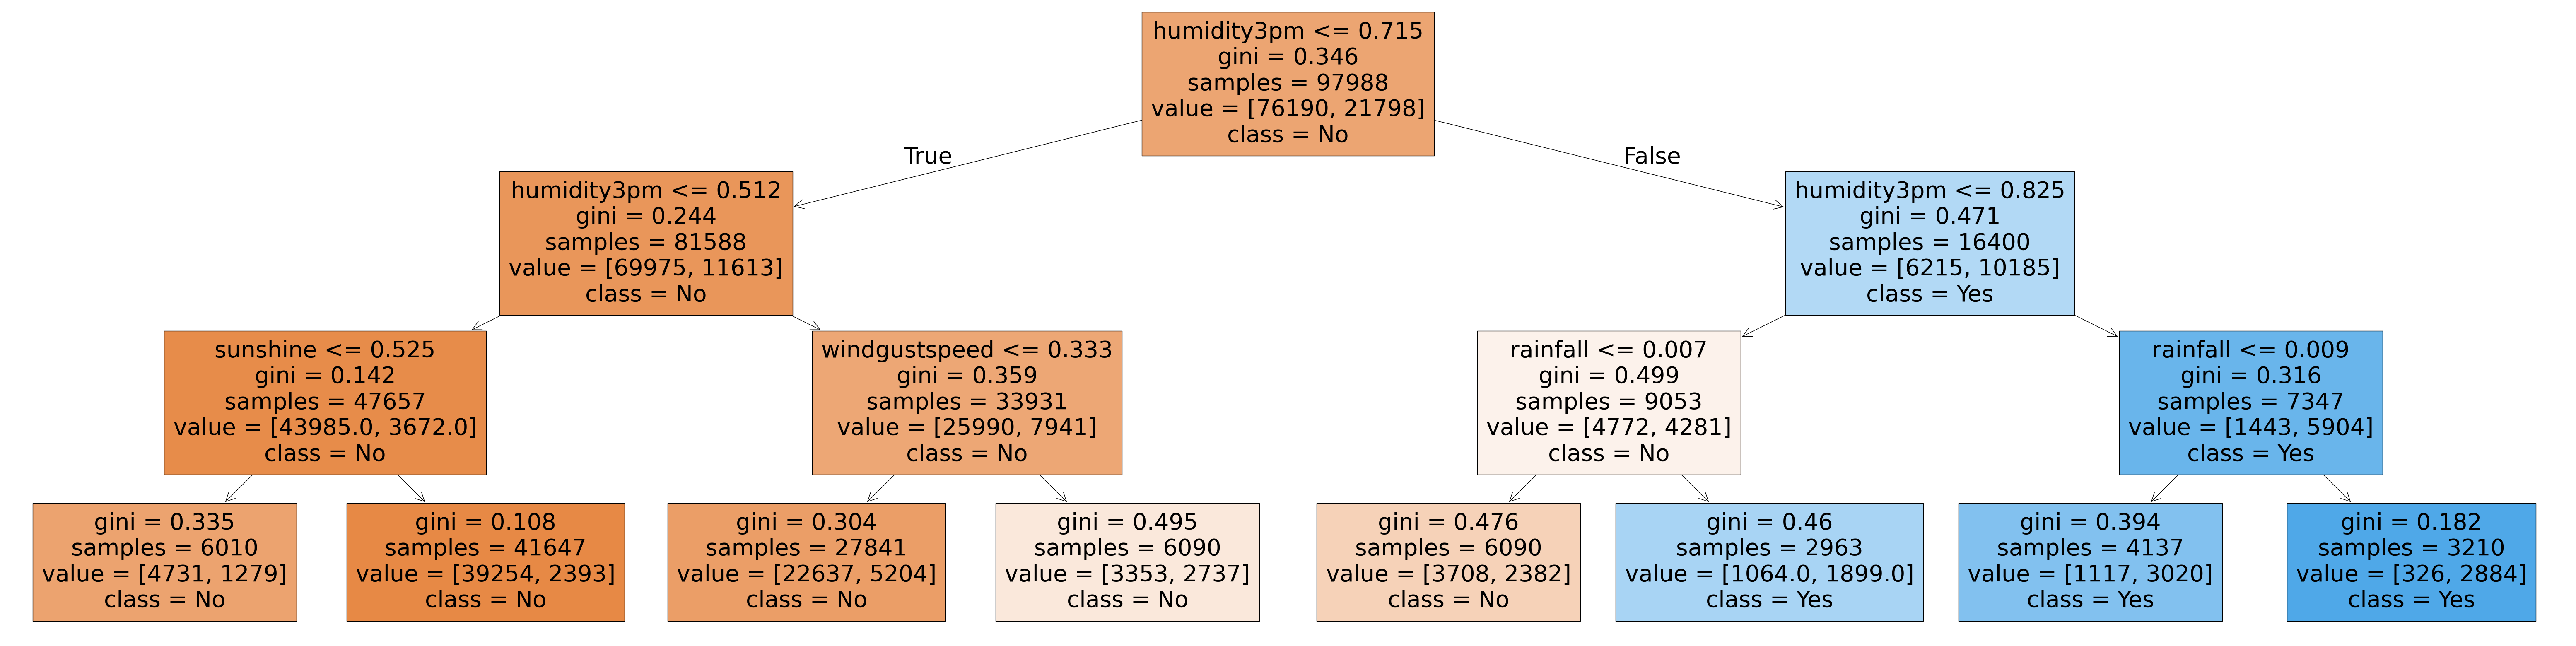

In [23]:
plt.figure(figsize=(80,20))
plot_tree(model_1,feature_names=xtrain.columns,max_depth=3,filled=True,class_names=model_1.classes_);

In [28]:
def max_depth_error(x):
    model=DecisionTreeClassifier(max_depth=x,random_state=42)
    model.fit(xtrain,ytrain)
    train_err = 1- model.score(xtrain,ytrain)
    val_err = 1- model.score(xval,yval)
    return {'max_depth':x , 'train_err':train_err , 'val_err':val_err}

In [29]:
%%time
errordf=pd.DataFrame(max_depth_error(i) for i in range (1,21))
errordf

CPU times: total: 20.2 s
Wall time: 20.5 s


,max_depth,train_err,val_err
0,1,0.181941,0.176488
1,2,0.176930,0.170695
2,3,0.168408,0.165194
3,4,0.162153,0.161624
4,5,0.157244,0.158113
5,6,0.153131,0.155831
6,7,0.149059,0.154602
7,8,0.144814,0.153842
8,9,0.139435,0.154544
9,10,0.131802,0.154778


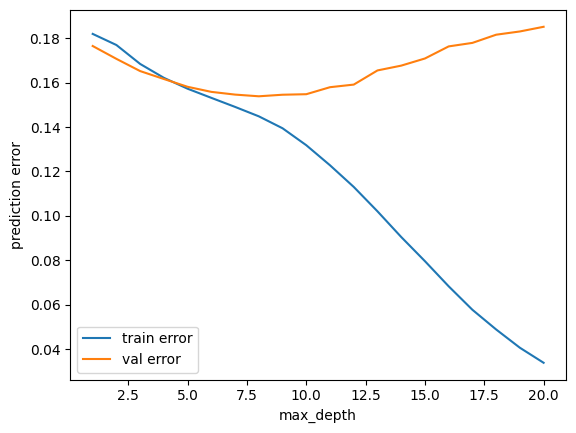

In [30]:
plt.plot(errordf['max_depth'],errordf['train_err']);
plt.plot(errordf['max_depth'],errordf['val_err']);
plt.legend(['train error','val error']);
plt.xlabel('max_depth');
plt.ylabel('prediction error');

In [31]:
model_2=DecisionTreeClassifier(max_depth=7,random_state=42).fit(xtrain,ytrain)

In [32]:
train_acc=model_2.score(xtrain,ytrain)
val_acc=model_2.score(xval,yval)
test_acc=model_2.score(xtest,ytest)
print(f'train acc:{train_acc}\n val acc:{val_acc}\n test acc:{test_acc}')

train acc:0.8509409315426378
 val acc:0.8453976242027035
 test acc:0.8334500194476857


In [34]:
best_acc = 0
best_leaf = None

for leaf in [5, 10, 20, 30, 50, 100,150,175]:  # try different max_leaf_nodes
    model = DecisionTreeClassifier(max_leaf_nodes=leaf, random_state=42)
    model.fit(xtrain, ytrain)
    ypred = model.predict(xval)
    acc = accuracy_score(yval, ypred)
    
    print(f"Max leaf nodes: {leaf}, Accuracy: {acc}")
    
    if acc > best_acc:
        best_acc = acc
        best_leaf = leaf

print(f"Best max_leaf_nodes: {best_leaf}, Best Accuracy: {best_acc}")

Max leaf nodes: 5, Accuracy: 0.8293054011352332
Max leaf nodes: 10, Accuracy: 0.8383755632278074
Max leaf nodes: 20, Accuracy: 0.8420621452396279
Max leaf nodes: 30, Accuracy: 0.8409503189186026
Max leaf nodes: 50, Accuracy: 0.8427058341623267
Max leaf nodes: 100, Accuracy: 0.8460998303001931
Max leaf nodes: 150, Accuracy: 0.8469775879220551
Max leaf nodes: 175, Accuracy: 0.8480308970682895
Best max_leaf_nodes: 175, Best Accuracy: 0.8480308970682895


In [35]:
model_3=DecisionTreeClassifier(max_depth=7,max_leaf_nodes=175,random_state=42).fit(xtrain,ytrain)

In [36]:
train_acc=model_3.score(xtrain,ytrain)
val_acc=model_3.score(xval,yval)
test_acc=model_3.score(xtest,ytest)
print(f'train acc:{train_acc}\n val acc:{val_acc}\n test acc:{test_acc}')

train acc:0.8509409315426378
 val acc:0.8453391070279127
 test acc:0.833411124076235


In [38]:
test_pred=model_3.predict(xtest)

Accuracy: 83.34%


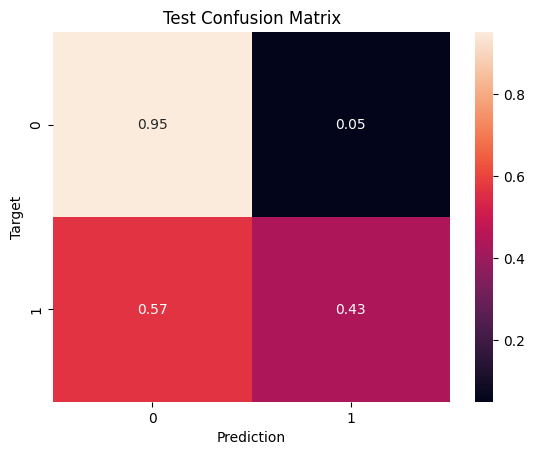

In [47]:
preds=model_3.predict(xtest)
accuracy=accuracy_score(ytest,preds)
print(f'Accuracy: {(accuracy*100):.2f}%')
cf=confusion_matrix(ytest,preds,normalize='true');
plt.figure();
sns.heatmap(cf,annot=True,);
plt.xlabel('Prediction');
plt.ylabel('Target');
plt.title('Test Confusion Matrix');

In [39]:
report = classification_report(ytest,test_pred)


In [41]:
print(report)

              precision    recall  f1-score   support

          No       0.85      0.95      0.90     19885
         Yes       0.72      0.43      0.54      5825

    accuracy                           0.83     25710
   macro avg       0.79      0.69      0.72     25710
weighted avg       0.82      0.83      0.82     25710

